Hay que hacer bonito esto pero es pa poner la direccion de la api 


In [1]:
import requests as rq
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lista_paises = [["japon", (1998, 2006), "WC"], ["corea-del-sur", (1998, 2006), "WC"], 
["alemania", (2002, 2010), "WC"], ["sudafrica", (2006, 2014), "WC"], ["brasil", (2010, 2018), "WC"], ["rusia", (2014, 2020), "WC"], 
["grecia", (2000, 2008), "OL"], ["china", (2004, 2012), "OL"], ["uk", (2008, 2016), "OL"], ["brasil", (2012, 2020), "OL"]]
l_ol = []
l_wc = []

In [3]:
for j in lista_paises:
    pais = j[0]
    anos = j[1]
    tipo = j[2]
    url = f"https://datosmacro.expansion.com/comercio/turismo-internacional/{pais}"
    page = rq.get(url)
    sopa = BeautifulSoup(page.content, "html.parser")
    tabla = sopa.find("table")
    valores = tabla.find_all('td')

    fechas = []
    gente = []
    for i in range(len(valores)):
        if i%2 == 0:
            fechas.append(valores[i].text)
        else:
            gente.append(valores[i].text)
    
    df = pd.DataFrame(columns=['Fecha', 'Turistas'])
    df['Fecha'] = fechas
    df['Turistas'] = gente
    df = df.sort_values('Fecha').reset_index(drop=True)
    df['Fecha'] = df['Fecha'].astype('int64')
    df['Turistas'] = df['Turistas'].apply(lambda x: x.replace('.', ''))
    df['Turistas'] = df['Turistas'].astype('int64')

    porcentaje = []
    for i in df["Turistas"]:
        if len(porcentaje) == 0:
            porcentaje.append(0)
            ultimo = i
        else:
            porc = (i*100)/ultimo
            porc -= 100
            porcentaje.append(porc)
            ultimo = i
    
    df['crecimiento'] = porcentaje
    df = df[df["Fecha"] <= anos[1]]
    df = df[df["Fecha"] >= anos[0]]
    df["Pais"] = pais
    df["Evento"] = tipo
    df.reset_index(drop=True, inplace=True)

    if tipo == "WC":
        l_wc.append(df)

    else:
        l_ol.append(df)
    

In [4]:
diff_anos = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
for df in l_wc:
   df['Diff_anos'] = diff_anos[:len(df)]

for df in l_ol:
   df['Diff_anos'] = diff_anos[:len(df)]


In [5]:
l_wc[0]

,Fecha,Turistas,crecimiento,Pais,Evento,Diff_anos
0,1998,4106000,-2.655287,japon,WC,-4
1,1999,4438000,8.085728,japon,WC,-3
2,2000,4757000,7.187922,japon,WC,-2
3,2001,4772000,0.315325,japon,WC,-1
4,2002,5239000,9.786253,japon,WC,0
5,2003,5212000,-0.515366,japon,WC,1
6,2004,6138000,17.766692,japon,WC,2
7,2005,6728000,9.612252,japon,WC,3
8,2006,7334000,9.007134,japon,WC,4


In [6]:
df_wc = pd.concat(l_wc, join='inner', ignore_index=True)
df_ol = pd.concat(l_ol, join='inner', ignore_index=True)

In [26]:
numeros = [-4, -3, -2, -1, 0]
columnas = []
for p in numeros:
    df_pru = df_wc[df_wc['Diff_anos']== p]
    columnas.append(df_pru['crecimiento'].values)
len(columnas)
columnas[0]
prueba = pd.DataFrame()
columnas[1]
n = 0
for p in columnas:
    prueba[str(numeros[n])] = p
    n += 1
paises = ['Japon', 'Korea del sur', 'Alemania', 'Sudafrica', 'Brasil', 'Rusia']
prueba['Paises'] = paises
prueba 

,-4,-3,-2,-1,0,Paises
0,-2.655287,8.085728,7.187922,0.315325,9.786253,Japon
1,8.751279,9.647059,14.206009,-3.288238,3.885759,Korea del sur
2,0.604669,2.393010,9.446166,6.768635,9.623256,Alemania
3,13.936762,8.277751,5.510945,-26.897415,15.145465,Sudafrica
4,7.476052,5.270296,4.491073,2.395631,10.614141,Brasil
5,5.290335,4.034422,-27.151709,-0.736641,0.660107,Rusia


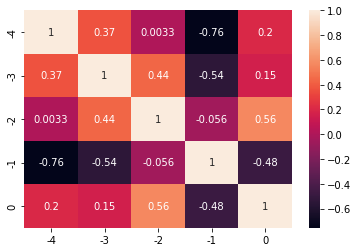

In [27]:
corr_df = prueba.corr(method='pearson')

sns.heatmap(corr_df, annot=True)
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [30]:
prueba_2 = prueba.drop(['Paises'], axis = 1)

In [31]:
linreg=LinearRegression()
train,test = train_test_split(prueba_2, test_size=0.2 , random_state=0)
y_train = train['0']
y_test = test['0']


X_train = train.drop(['0'], axis=1)
X_test = test.drop(['0'], axis=1)
#acabo de seleccionar mis train
#esta  bueno separe los datos de mi y

linreg.fit(X_train, y_train)

LinearRegression()

In [32]:
linreg.score(X_train, y_train)

1.0

In [7]:
df_total = pd.concat([df_wc, df_ol], join='inner', ignore_index=True)
df_total

,Fecha,Turistas,crecimiento,Pais,Evento,Diff_anos
0,1998,4106000,-2.655287,japon,WC,-4
1,1999,4438000,8.085728,japon,WC,-3
2,2000,4757000,7.187922,japon,WC,-2
3,2001,4772000,0.315325,japon,WC,-1
4,2002,5239000,9.786253,japon,WC,0
...,...,...,...,...,...,...
81,2015,6306000,-1.928460,brasil,OL,-1
82,2016,6547000,3.821757,brasil,OL,0
83,2017,6589000,0.641515,brasil,OL,1
84,2018,6621000,0.485658,brasil,OL,2


In [8]:
df_prueba = df_total.groupby(by='Diff_anos')
df_prueba

In [9]:
df_prueba = df_total[['crecimiento', 'Diff_anos']]
df_prueba

,crecimiento,Diff_anos
0,-2.655287,-4
1,8.085728,-3
2,7.187922,-2
3,0.315325,-1
4,9.786253,0
...,...,...
81,-1.928460,-1
82,3.821757,0
83,0.641515,1
84,0.485658,2


In [10]:
df_prueba = pd.DataFrame(columns=['Pais', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4'])
df_prueba

,Pais,-4,-3,-2,-1,0,1,2,3,4


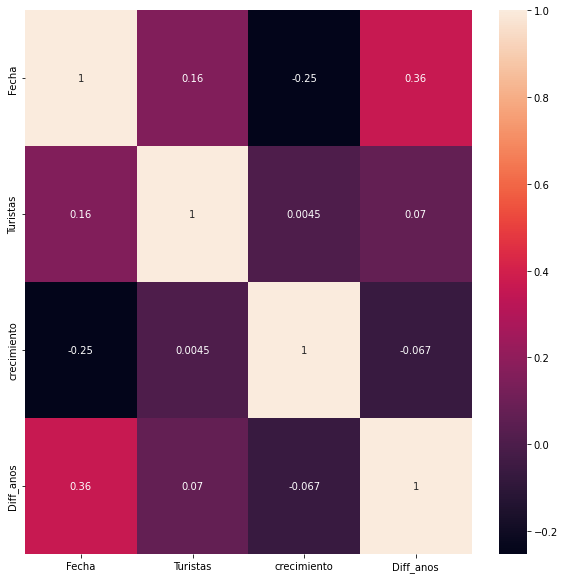

In [11]:
df_heatmap = df_total.corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(df_heatmap, annot=True)
plt.show()

In [13]:
url = f"https://datosmacro.expansion.com/comercio/turismo-internacional/chile"
page = rq.get(url)
sopa = BeautifulSoup(page.content, "html.parser")
tabla = sopa.find("table")
valores = tabla.find_all('td')

fechas = []
gente = []
for i in range(len(valores)):
    if i%2 == 0:
        fechas.append(valores[i].text)
    else:
        gente.append(valores[i].text)

df_chile = pd.DataFrame(columns=['Fecha', 'Turistas'])
df_chile['Fecha'] = fechas
df_chile['Turistas'] = gente
df_chile = df_chile.sort_values('Fecha').reset_index(drop=True)
df_chile['Fecha'] = df_chile['Fecha'].astype('int64')
df_chile['Turistas'] = df_chile['Turistas'].apply(lambda x: x.replace('.', ''))
df_chile['Turistas'] = df_chile['Turistas'].astype('int64')

porcentaje = []
for i in df["Turistas"]:
    if len(porcentaje) == 0:
        porcentaje.append(0)
        ultimo = i
    else:
        porc = (i*100)/ultimo
        porc -= 100
        porcentaje.append(porc)
        ultimo = i

df_chile['crecimiento'] = porcentaje
df_chile

ValueError: Length of values (8) does not match length of index (25)

Ver crecimiento mundial de pib, promedio y calcular el promedio de cada pais y comparar

Hipótesis:   
1. La organización de un mundial hace que en el tiempo cercano al evento (los 2 años antes) se incrementa el gasto en el turismo, ya que se espera que el mundial fomente el turismo en el país.   
2. El mundial genera una mayor llegada de turistas en el año y en el próximo lustro.   
3. La mayor llegada de turistas genera más ingresos por turismo.   
4. Esto al final no influye mucho en el pib (no genera más de medio punto de cambio en el per capita)

Organizar:
Calcular diferencia porcentual por pais del pib, ingreso neto, ingreso personas
Despues de calcular eso:
3 graficos pequeños con lo calculado, grafico por pais (pairplot)
Final:
3 graficos finales con 4 antes por pais (color por wc y ol) y 4 despues con lo mismo y asi hacer difecrencia por pais
